In [54]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

file_path = "/Users/kdn_aisashwat/Desktop/esg-investment-advisor /data_preprocessing/final_processed_esg_data.csv"
df = pd.read_csv(file_path)


missing_sentiment = df["Sentiment Score"].isna().sum()

#industry median
df["Sentiment Score"] = df.groupby("industry")["Sentiment Score"].transform(lambda x: x.fillna(x.median()))


missing_sentiment_after = df["Sentiment Score"].isna().sum()

missing_sentiment, missing_sentiment_after


/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: Run

(np.int64(667), np.int64(667))

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


columns_to_drop = ["Ticker", "Company", "Currency", "Exchange"]  
df = df.drop(columns=columns_to_drop, errors="ignore")

#industry median
df["Sentiment Score"] = df.groupby("industry")["Sentiment Score"].transform(lambda x: x.fillna(x.median()))

#median
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

#encoding
cat_cols = df.select_dtypes(include=["object"]).columns

#check
df.isna().sum().sum()


/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/kdn_aisashwat/Desktop/esg-investment-advisor /venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: Run

np.int64(0)

In [55]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Sentiment Score"]) 
y = df["Sentiment Score"] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((607, 36), (152, 36), (607,), (152,))

In [ ]:

import numpy as np  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=1)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


ValueError: could not convert string to float: 'nwl'

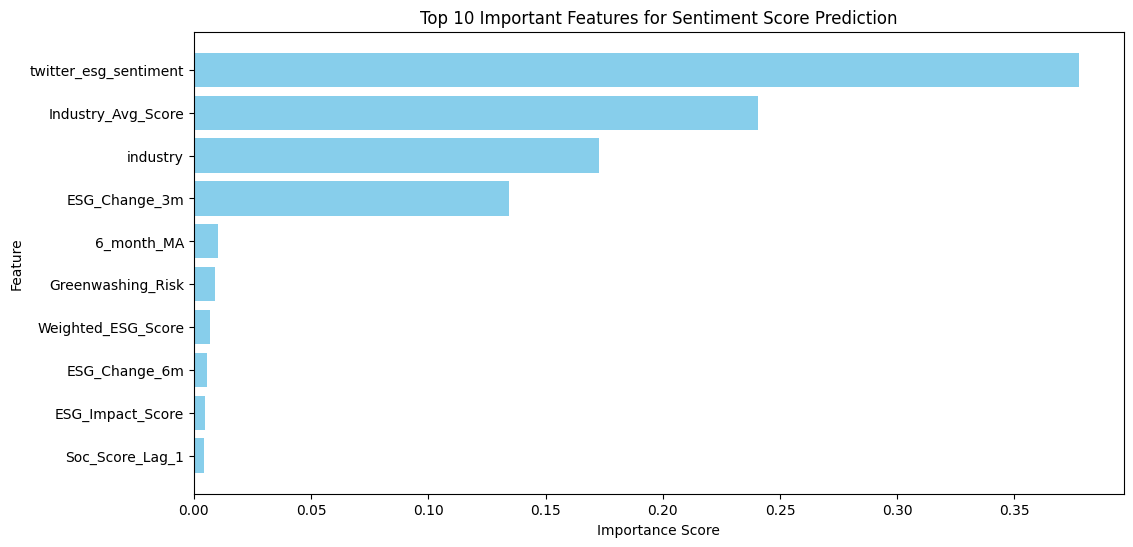

                  Feature  Importance
21  twitter_esg_sentiment    0.377719
19     Industry_Avg_Score    0.240733
0                industry    0.172864
26          ESG_Change_3m    0.134328
25             6_month_MA    0.010221
31      Greenwashing_Risk    0.008906
30     Weighted_ESG_Score    0.007042
27          ESG_Change_6m    0.005803
13       ESG_Impact_Score    0.004790
29        Soc_Score_Lag_1    0.004542


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

#feature importances
feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features for Sentiment Score Prediction")
plt.gca().invert_yaxis() 
plt.show()


print(feature_importance_df.head(10))


In [14]:
import pickle

#save
with open("sentiment_rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved as 'sentiment_rf_model.pkl'")


✅ Model saved as 'sentiment_rf_model.pkl'


In [79]:
df = pd.read_csv("/Users/kdn_aisashwat/Desktop/esg-investment-advisor /data_preprocessing/final_processed_esg_data.csv")


env_min = df["Env_Score"].min
env_max = df["Env_Score"].max
gov_min = df["Gov_Score"].min
gov_max = df["Gov_Score"].max
soc_min = df["Soc_Score"].min
soc_max = df["Soc_Score"].max

print("Min values:\n", df[['Env_Score', 'Gov_Score', 'Soc_Score']].min())
print("Max values:\n", df[['Env_Score', 'Gov_Score', 'Soc_Score']].max())


Min values:
 Env_Score    200.0
Gov_Score     75.0
Soc_Score    160.0
dtype: float64
Max values:
 Env_Score    719.0
Gov_Score    475.0
Soc_Score    667.0
dtype: float64


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle


df = pd.read_csv("/Users/kdn_aisashwat/Desktop/esg-investment-advisor /data_preprocessing/final_processed_esg_data.csv")


features = ["Env_Score", "Gov_Score", "Soc_Score"]


X = df[features]
y = df["Greenwashing_Risk"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Model Accuracy:", accuracy)
print("Classification Report:", report)


with open("greenwashing_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("Model saved as 'greenwashing_model.pkl'")


Model Accuracy: 0.7236842105263158
Classification Report: {'0': {'precision': 0.7642857142857142, 'recall': 0.9224137931034483, 'f1-score': 0.8359375, 'support': 116.0}, '1': {'precision': 0.25, 'recall': 0.08333333333333333, 'f1-score': 0.125, 'support': 36.0}, 'accuracy': 0.7236842105263158, 'macro avg': {'precision': 0.5071428571428571, 'recall': 0.5028735632183908, 'f1-score': 0.48046875, 'support': 152.0}, 'weighted avg': {'precision': 0.6424812030075188, 'recall': 0.7236842105263158, 'f1-score': 0.6675575657894737, 'support': 152.0}}
Model saved as 'greenwashing_model.pkl'


In [74]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


file_path = "/Users/kdn_aisashwat/Desktop/esg-investment-advisor /data_preprocessing/final_processed_esg_data.csv"
df = pd.read_csv(file_path)


features = ["Env_Score", "Gov_Score", "Soc_Score"]
target = "Weighted_ESG_Score"

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


model = xgb.XGBRegressor(
    n_estimators=200,      #number of trees
    max_depth=6,           #moderate depth to prevent overfitting
    learning_rate=0.1,     #learning rate
    subsample=0.8,         #prevent overfitting
    colsample_bytree=0.8,  #feature sampling per tree
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


🔹 R² Score: 0.9961
🔹 MAE: 2.7867
🔹 MSE: 25.5602
🔹 RMSE: 5.0557


In [75]:
import pickle


with open("esg_score_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as 'esg_score_model.pkl'")


Model saved as 'esg_score_model.pkl'
